#Missing Data Handling with fillna, Mean,mode etc.

In [39]:
#importing important modules

import numpy as np
import pandas as pd

import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

In [40]:
data = {
    'A':[12,25,66,np.nan,45],
    'B':[45,32,41,41,np.nan],
    'C':[12,25,45,33,16],
    'D':[39,56,np.nan,26,np.nan]
}

In [41]:
df=pd.DataFrame(data)

In [42]:
df

,A,B,C,D
0,12.0,45.0,12,39.0
1,25.0,32.0,25,56.0
2,66.0,41.0,45,NaN
3,NaN,41.0,33,26.0
4,45.0,NaN,16,NaN


In [43]:
df.isnull().sum()

A    1
B    1
C    0
D    2
dtype: int64

In [44]:
df['A'].mean()

37.0

In [45]:
df['B'].mean()

39.75

In [46]:
df['C'].mean()

26.2

In [47]:
df['D'].mean()

40.333333333333336

In [48]:
df

,A,B,C,D
0,12.0,45.0,12,39.0
1,25.0,32.0,25,56.0
2,66.0,41.0,45,NaN
3,NaN,41.0,33,26.0
4,45.0,NaN,16,NaN


In [49]:
df.fillna(df.mean())

,A,B,C,D
0,12.0,45.00,12,39.000000
1,25.0,32.00,25,56.000000
2,66.0,41.00,45,40.333333
3,37.0,41.00,33,26.000000
4,45.0,39.75,16,40.333333


In [50]:
df

,A,B,C,D
0,12.0,45.0,12,39.0
1,25.0,32.0,25,56.0
2,66.0,41.0,45,NaN
3,NaN,41.0,33,26.0
4,45.0,NaN,16,NaN


In [51]:
print(f'A: {df.A.median()}')
print(f'B: {df.B.median()}')
print(f'C: {df.C.median()}')
print(f'D: {df.D.median()}')

A: 35.0
B: 41.0
C: 25.0
D: 39.0


In [52]:
df.fillna(df.median())

,A,B,C,D
0,12.0,45.0,12,39.0
1,25.0,32.0,25,56.0
2,66.0,41.0,45,39.0
3,35.0,41.0,33,26.0
4,45.0,41.0,16,39.0


In [53]:
df= sns.load_dataset('titanic')

In [54]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
df['age'].isnull().sum()

177

In [56]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [57]:
df.shape

(891, 15)

Save in Different Variable

In [58]:
new_df=df.drop_duplicates()

In [59]:
new_df.shape

(784, 15)

In [60]:
new_df=df.dropna(axis=0)

In [61]:
new_df.dropna(axis=1,inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_14616\3031917127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(axis=1,inplace=True)


In [62]:
new_df.shape

(182, 15)

In [63]:
new_df.duplicated().sum()

1

In [64]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [65]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

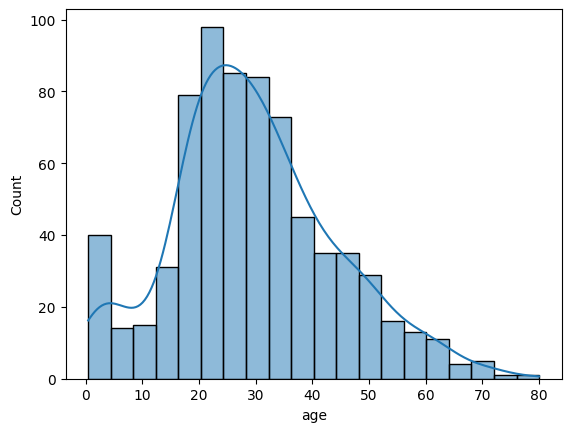

In [66]:
import matplotlib.pyplot as plt
sns.histplot(df.age, kde=True)

In [67]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#Numerical Mising Value Handling

In [68]:
df['df_age_mean'] = df.age.fillna(df.age.mean())

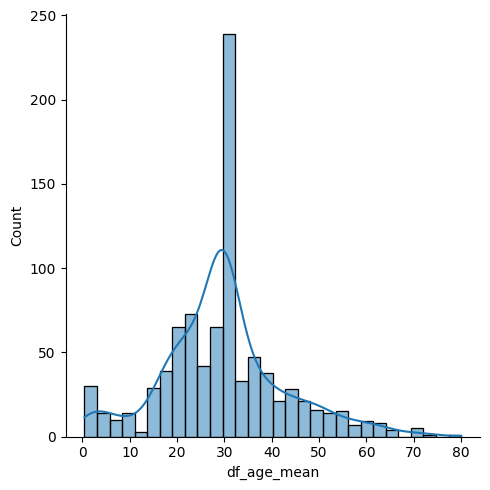

In [69]:
sns.displot(df['df_age_mean'],kde=True)

In [70]:
df['df_age_median'] = df.age.fillna(df.age.median())

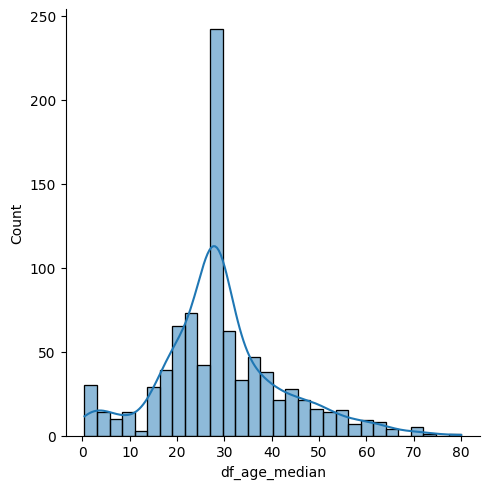

In [71]:
sns.displot(df['df_age_median'],kde = True)

In [72]:
df[['age','df_age_mean','df_age_median']]

,age,df_age_mean,df_age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


In [73]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'df_age_mean', 'df_age_median'],
      dtype='object')

In [78]:
df.isna().sum()

survived           0
pclass             0
sex                0
age              177
sibsp              0
parch              0
fare               0
embarked           2
class              0
who                0
adult_male         0
deck             688
embark_town        2
alive              0
alone              0
df_age_mean        0
df_age_median      0
dtype: int64

##Categorical Missing Value Handling 

In [85]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [96]:
df['updated_embark']= df['embarked'].fillna(mode_value)

In [100]:
df[['embarked', 'updated_embark']]

,embarked,updated_embark
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [109]:
df['embarked'].isna().sum()

2

In [107]:
df['updated_embark'].isna().sum()

0